**Problem 1A**

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim


# Dataset Given in the Lecture
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Model Defined
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices, val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u
train_loss_list = []
val_loss_list = []

def training_loop(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        val_loss_list.append(val_loss.item())

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())

        if epoch <= 1 or epoch % 500 ==0:
            #epoch_list.append(epoch)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "f"Validation loss {val_loss.item():.4f}")

    return params

dir(optim)
t_un = 0.1 * t_u


tensor([4, 5, 0, 2, 6, 8, 1, 3, 9]) tensor([ 7, 10])


**Problem 1B**

Epoch 1, Training loss 694.4211, Validation loss 591.9736
Epoch 500, Training loss 2.4707, Validation loss 6.6334
Epoch 1000, Training loss 2.4237, Validation loss 5.8945
Epoch 1500, Training loss 2.3708, Validation loss 5.0249
Epoch 2000, Training loss 2.3218, Validation loss 4.1610
Epoch 2500, Training loss 2.2839, Validation loss 3.4118
Epoch 3000, Training loss 2.2596, Validation loss 2.8404
Epoch 3500, Training loss 2.2473, Validation loss 2.4570
Epoch 4000, Training loss 2.2426, Validation loss 2.2310
Epoch 4500, Training loss 2.2413, Validation loss 2.1152
Epoch 5000, Training loss 2.2411, Validation loss 2.0656


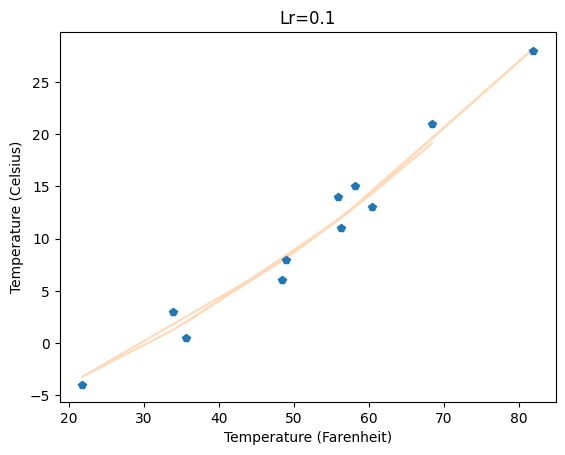

In [6]:

# Learning Rate = 0.1
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)
t_p = model(t_un, *params)

# Plot the loss
fig = plt.figure(dpi=100)
plt.title("Lr=0.1")
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')



Epoch 1, Training loss 694.4211, Validation loss 591.9736
Epoch 500, Training loss 4.3811, Validation loss 17.2388
Epoch 1000, Training loss 3.1161, Validation loss 12.2830
Epoch 1500, Training loss 2.6101, Validation loss 9.0646
Epoch 2000, Training loss 2.5001, Validation loss 7.5296
Epoch 2500, Training loss 2.4831, Validation loss 6.9454
Epoch 3000, Training loss 2.4750, Validation loss 6.7174
Epoch 3500, Training loss 2.4655, Validation loss 6.5555
Epoch 4000, Training loss 2.4537, Validation loss 6.3716
Epoch 4500, Training loss 2.4394, Validation loss 6.1476
Epoch 5000, Training loss 2.4225, Validation loss 5.8779


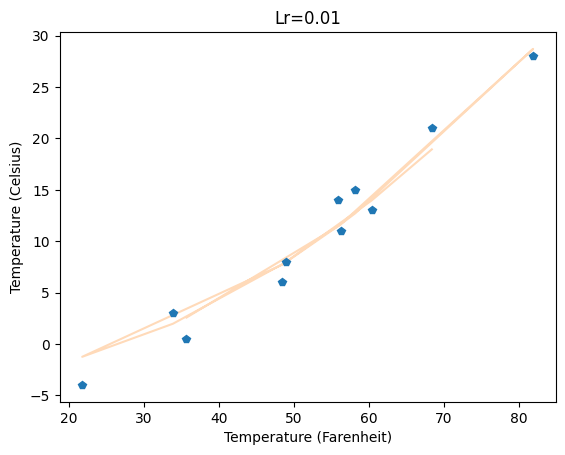

In [9]:
# Learning Rate = 0.01

params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=100)
plt.title("Lr=0.01")

plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')

Epoch 1, Training loss 694.4211, Validation loss 591.9736
Epoch 500, Training loss 106.5945, Validation loss 86.4414
Epoch 1000, Training loss 10.8660, Validation loss 19.0962
Epoch 1500, Training loss 5.5034, Validation loss 19.8211
Epoch 2000, Training loss 5.2597, Validation loss 19.9679
Epoch 2500, Training loss 5.0410, Validation loss 19.3437
Epoch 3000, Training loss 4.7807, Validation loss 18.5373
Epoch 3500, Training loss 4.4828, Validation loss 17.5789
Epoch 4000, Training loss 4.1560, Validation loss 16.4757
Epoch 4500, Training loss 3.8153, Validation loss 15.2486
Epoch 5000, Training loss 3.4807, Validation loss 13.9361


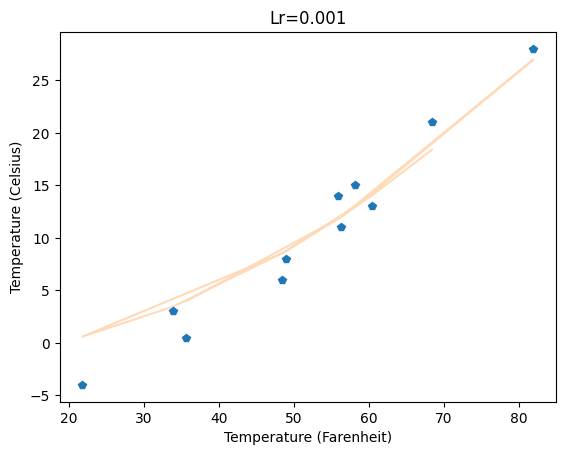

In [8]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=100)
plt.title("Lr=0.001")

plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')

Epoch 1, Training loss 694.4211, Validation loss 591.9736
Epoch 500, Training loss 594.7400, Validation loss 503.9637
Epoch 1000, Training loss 505.7031, Validation loss 425.7857
Epoch 1500, Training loss 426.4284, Validation loss 356.6196
Epoch 2000, Training loss 356.0193, Validation loss 295.6394
Epoch 2500, Training loss 293.7438, Validation loss 242.1686
Epoch 3000, Training loss 239.0023, Validation loss 195.6501
Epoch 3500, Training loss 191.2927, Validation loss 155.6132
Epoch 4000, Training loss 150.1817, Validation loss 121.6459
Epoch 4500, Training loss 115.2756, Validation loss 93.3683
Epoch 5000, Training loss 86.1950, Validation loss 70.4067


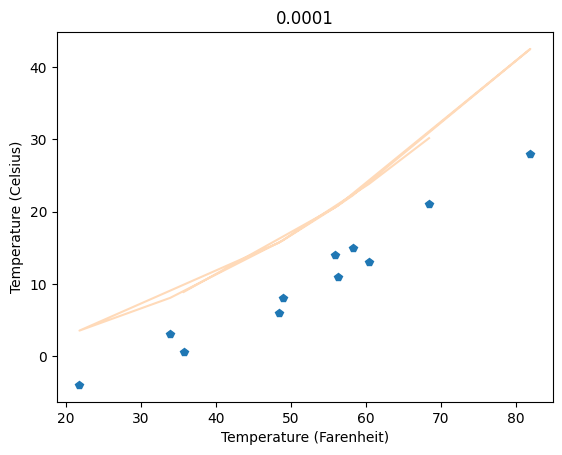

In [7]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

t_p = model(t_un, *params)
fig = plt.figure(dpi=100)
plt.title("0.0001")
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')

**Problem 1C**

The best-performing model is the one with a learning rate of 0.1, as it achieves the lowest validation loss. Overall, non-linear models are preferred due to their consistently smaller validation losses compared to linear alternatives.